In [229]:
import numpy as np

def binSplitDataSet(dataSet, feature, val):
    mat0 = dataSet[np.nonzero(dataSet[:,feature] > val),:][0]
    #mat0 = dataSet[(np.array([0]), np.array([0])),:][0]
   # print(mat0)
    mat1 = dataSet[np.nonzero(dataSet[:,feature] <= val),:][0]
    #print(np.nonzero(dataSet[:,feature] <= val))
    #print(dataSet[np.nonzero(dataSet[:,feature] <= val),:])
    return mat0, mat1


In [230]:
testMat = np.mat(np.eye(3))
print("mat",testMat)
print(binSplitDataSet(testMat,0, 0.5))

mat [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
(matrix([[1., 0., 0.]]), matrix([[0., 1., 0.],
        [0., 0., 1.]]))


In [231]:
dataSet = np.random.randn(100,2)
#print(dataSet)

In [232]:
def regLeaf(dataSet):
    return np.mean(dataSet[:,-1])

In [233]:
def regErr(dataSet):
    return np.var(dataSet[:,-1]) * np.shape(dataSet)[0]


In [234]:
def chooseBestSplit(dataSet, leafType=regLeaf, errType=regErr, ops=(1,4)):
    tolS = ops[0]
    tolN = ops[1]
    if len(set(dataSet[:,-1].T.tolist())) == 1:
        return None, leafType(dataSet)
    
    m,n = np.shape(dataSet)
    S = errType(dataSet)
    bestS = np.Inf; bestIndex = 0; bestValue = 0
    for featIndex in range(n-1):
        #print("featindex:",featIndex)
        for splitVal in set(dataSet[:, featIndex]):
           # print("splitVal:",splitVal)
            mat0, mat1 = binSplitDataSet(dataSet, featIndex, splitVal)
            #print("mat0:",mat0)
            #print("mat1",mat1)
            if ((np.shape(mat0)[0] < tolN) or (np.shape(mat1)[0] < tolN)):
                continue
            newS = errType(mat0) + errType(mat1)
           # print("newS:",newS, " bestS:",bestS)
            if newS < bestS:
                bestIndex = featIndex
                bestValue = splitVal
                bestS = newS
    print("S:",S, " bestS:",bestS)
    if abs(S-bestS) < tolS:
        return None, leafType(dataSet)
    mat0, mat1 = binSplitDataSet(dataSet, bestIndex, bestValue)
    #print("mat0:",mat0, " mat1:",mat1)
    if ((np.shape(mat0)[0] < tolN) or (np.shape(mat1)[0] < tolN)):
        return None, leafType(dataSet)
    return bestIndex, bestValue
    
        

In [235]:
#res = chooseBestSplit(dataSet)

In [236]:
def createTree(dataSet, leafType=regLeaf, errType=regErr, ops=(1,4)):
    feat, val = chooseBestSplit(dataSet, leafType, errType, ops)
    print("feat:",feat, " val:",val)
    if feat == None: return val
    retTree = {}
    retTree['spInd'] = feat
    retTree['spVal'] = val
    lSet, rSet = binSplitDataSet(dataSet, feat, val)
    retTree['left'] = createTree(lSet, leafType, errType, ops)
    retTree['right'] = createTree(rSet, leafType, errType, ops)
    return retTree

In [237]:
ans = createTree(dataSet)


S: 96.84713211690286  bestS: 89.97469027586399
feat: 0  val: -0.9716793775394036
S: 77.57456639679812  bestS: 75.35240902735308
feat: 0  val: 0.9651004976637987
S: 25.148843122400127  bestS: 20.377561504516887
feat: 0  val: 1.1927950454878795
S: 18.423141860633862  bestS: 17.023851265279347
feat: 0  val: 1.8719637044096455
S: 0.4346856707708735  bestS: inf
feat: None  val: -0.18251493288552686
S: 16.589165594508476  bestS: 13.918310789779577
feat: 0  val: 1.7397095891798164
S: 11.60790207817771  bestS: inf
feat: None  val: 1.1373875359197814
S: 2.3104087116018657  bestS: inf
feat: None  val: 0.04108253176810596
S: 1.954419643883024  bestS: inf
feat: None  val: -0.8398606384500908
S: 50.203565904952946  bestS: 47.30965965514419
feat: 0  val: 0.7279047743987712
S: 7.846881440002596  bestS: inf
feat: None  val: 0.9947164976929255
S: 39.46277821514159  bestS: 36.36922904382317
feat: 0  val: 0.5579742186405845
S: 2.476981750335296  bestS: 2.3538457128483348
feat: None  val: -0.2248314251896

In [238]:
def isTree(obj):
    return (type(obj).__name__ == 'dict')

In [239]:
def getMean(tree):
    if isTree(tree['left']):
        tree['left'] = getMean(tree['left'])
    if isTree(tree['right']):
        tree['right'] = getMean(tree['right'])
    return (tree['left'] + tree['right']) / 2.0

In [240]:
def prune(tree, testData):
    #print("shape:",np.shape(testData), testData[0])
    if (np.shape(testData)[0] == 0):
        return getMean(tree)
    lSet, rSet = binSplitDataSet(testData, tree['spInd'], tree['spVal'])
    if isTree(tree['left']):
        tree['left'] = prune(tree['left'], lSet)
    if isTree(tree['right']):
        tree['right'] = prune(tree['right'], rSet)
    if not isTree(tree['left']) and not isTree(tree['right']):
        errNoMerge = sum(np.power((lSet[:,-1] - tree['left']),2)) + sum(np.power((rSet[:,-1] - tree['right']),2))
        treeMean = getMean(tree)
        errMerge = sum(np.power(testData[:,-1] - treeMean, 2))
        if (errMerge < errNoMerge):
            return treeMean
        else:
            return tree
    else:
        return tree

In [241]:
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = map(float, curLine)   #将数据映射成浮点型,返回的是map的地址
        dataMat.append(list(fltLine))
    return dataMat

In [242]:
ex2TestData = loadDataSet('datatest/ex2test.txt')
prnueTree = prune(ans, np.mat(ex2TestData))
print(prnueTree)

{'spInd': 0, 'spVal': -0.9716793775394036, 'left': {'spInd': 0, 'spVal': 0.9651004976637987, 'left': -0.31825029398544125, 'right': {'spInd': 0, 'spVal': 0.7279047743987712, 'left': 0.9947164976929255, 'right': {'spInd': 0, 'spVal': 0.5579742186405845, 'left': -0.2248314251896147, 'right': {'spInd': 0, 'spVal': 0.3502458011270344, 'left': 1.0112742394654268, 'right': {'spInd': 0, 'spVal': 0.17628139646442537, 'left': -0.26061286266767236, 'right': {'spInd': 0, 'spVal': 0.05470770849194781, 'left': 1.1009539135074764, 'right': 0.3283474914353916}}}}}}, 'right': -0.581746473469747}


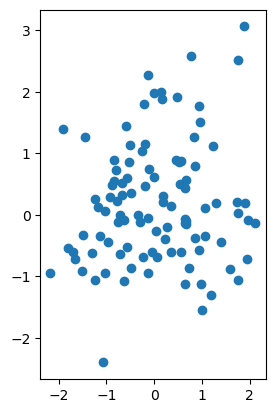

In [243]:
import matplotlib.pyplot as plt

plt.subplot(121)
plt.scatter(dataSet[:,0], dataSet[:,1])

plt.show()